In [2]:
import pandas as pd

df=pd.read_csv("test.csv")

df.columns = df.columns.str.strip()
df.head()

,time,Close
0,9:30 AM,19397.00
1,9:35 AM,19399.65
2,9:40 AM,19405.35
3,9:45 AM,19403.15
4,9:50 AM,19397.30


In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

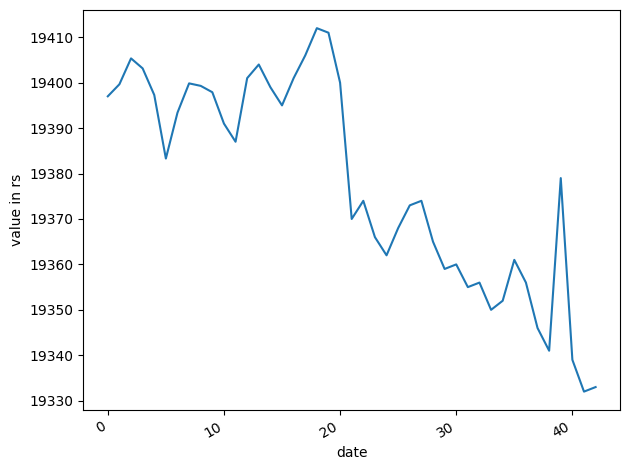

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df['Close']) 
ax.set_xlabel('date') 
ax.set_ylabel('value in rs') 
#plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2)) 
fig.autofmt_xdate() 
plt.tight_layout()

In [5]:
ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.1152929381209116
p-value: 0.7089348869241764


In [6]:
value_diff = np.diff(df['Close'], n=1)

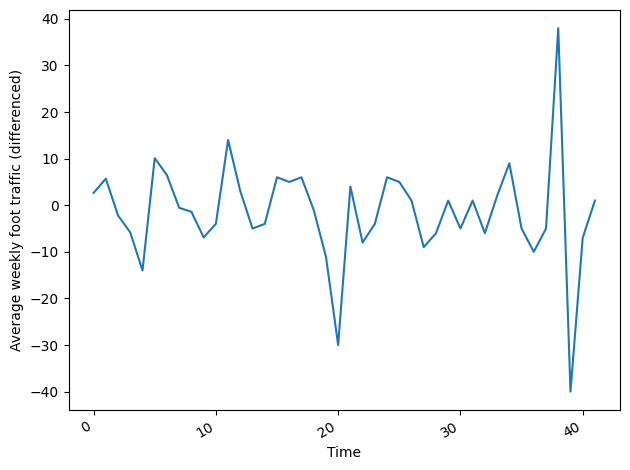

In [7]:
fig, ax = plt.subplots()

ax.plot(value_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic (differenced)')

#plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH05_F05_peixeiro.png', dpi=300)

In [8]:
ADF_result = adfuller(value_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -7.757616400262883
p-value: 9.643256234976955e-12


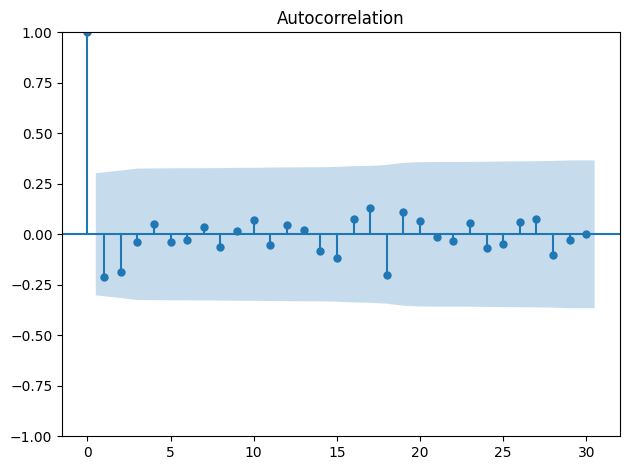

In [9]:
plot_acf(value_diff, lags=30)

plt.tight_layout()

#plt.savefig('figures/CH05_F06_peixeiro.png', dpi=300)

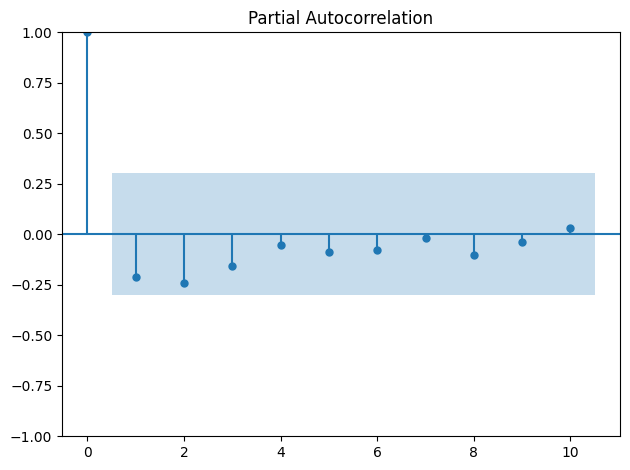

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(value_diff, lags=10)

plt.tight_layout()

In [4]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=NSE:HDFC&interval=1min&apikey=TLHUCOPTLZMMJ00W'
r = requests.get(url)
data = r.json()

print(data)

{}
